<a href="https://colab.research.google.com/github/JacksonReber/BuildWeek/blob/master/Jackson_Reber_Build_Week_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
from statsmodels.formula.api import ols
from pandas_profiling import ProfileReport
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders==2.*
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

In [411]:
#Reading in the data frame
df = pd.read_csv('StudentsPerformance.csv')
#Wrangle function
def wrangle(df):
  #creating a new column called "Average Test Scores" which averages the 3 test scores 
  #df['Average_Test_Scores'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
  #Dropping the individual test scores
  #df.drop(['math score', 'writing score', 'reading score'],axis = 1, inplace=True)
  df.loc[df['parental level of education'] == "some high school", 'parental level of education'] = 0
  df.loc[df['parental level of education'] == "high school", 'parental level of education'] = 1
  df.loc[df['parental level of education'] == "some college", 'parental level of education'] = 2
  df.loc[df['parental level of education'] == "associate's degree", 'parental level of education'] = 3
  df.loc[df['parental level of education'] == "bachelor's degree", 'parental level of education'] = 4
  df.loc[df['parental level of education'] == "master's degree", 'parental level of education'] = 5
  df['parental level of education'] = df['parental level of education'].astype(int)
  return df
df = wrangle(df)

In [412]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,3,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75


In [413]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,3,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75


In [414]:
#Checking the shape of the data set
df.shape

(1000, 8)

In [415]:
#Checking for any null values in the data set
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [416]:
#Setting target variable to parental level of education
target = 'parental level of education'
X = df.drop(target, axis=1)
y = df[target]

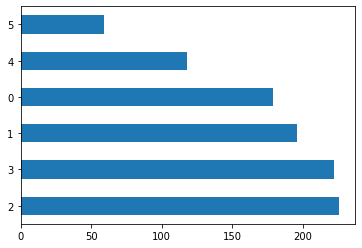

In [417]:
df['parental level of education'].value_counts().plot(kind='barh')

In [418]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [419]:
#calculating a baseline accuracy (for class is .value_counts(normalize=True).max())
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.2275


In [420]:
#making a fast first random forest model that beats guessing
#hyper perameter tuning (max depth, n_estimators)
rf_model = make_pipeline(OrdinalEncoder(),
                           RandomForestClassifier(random_state=42, max_depth = 25, n_estimators=50))
#Fitting the logistic regression model
rf_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'race/ethnicity', 'lunch',
                                      'test preparation course'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': female    1
male      2
NaN      -2
dtype: int64},
                                         {'col': 'race/ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': group D    1
group...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features='auto',
      

In [421]:
#predicting "average test scores" with the model
y_pred=rf_model.predict(X_test)
y_pred

array([3, 0, 3, 4, 3, 2, 1, 3, 0, 1, 0, 2, 1, 0, 3, 2, 2, 0, 2, 0, 3, 0,
       2, 1, 3, 2, 2, 0, 0, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 0, 3,
       1, 1, 1, 2, 3, 0, 2, 1, 3, 1, 2, 1, 2, 1, 0, 2, 2, 4, 2, 2, 3, 4,
       3, 1, 1, 3, 4, 2, 3, 0, 1, 0, 2, 4, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 0, 4, 2, 2, 0, 1, 0, 3, 1, 3, 0, 2, 0, 3, 1, 2, 2, 1, 0, 0,
       1, 4, 1, 1, 4, 1, 3, 1, 1, 3, 0, 2, 2, 2, 1, 0, 2, 0, 2, 3, 4, 1,
       0, 3, 2, 2, 0, 3, 0, 0, 0, 3, 2, 3, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2,
       0, 2, 0, 1, 3, 1, 3, 4, 4, 1, 2, 0, 3, 3, 1, 0, 3, 2, 3, 0, 0, 2,
       2, 4, 3, 2, 3, 3, 4, 3, 3, 2, 1, 1, 0, 4, 1, 2, 3, 0, 1, 3, 0, 0,
       3, 1])

In [422]:
#getting accuracy of the model
score = rf_model.score(X_train,y_train)
score

0.99875

In [423]:
score1 = rf_model.score(X_test,y_test)
score1

0.195

In [424]:
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_
features = rf_model.named_steps['ordinalencoder'].get_feature_names()
feat_imp = pd.Series(importances,index=features).sort_values()

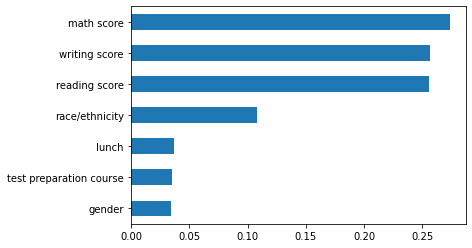

In [425]:
feat_imp.tail(10).plot(kind='barh')

In [426]:
param_grid = {
    'randomforestclassifier__max_depth': range(5,35,5),
    'randomforestclassifier__n_estimators': range(25,125,25)}
#doing a randomized search to find the pest hyper parameters for the random forest model
model_rfrs = RandomizedSearchCV(
    rf_model,
    param_distributions = param_grid,
    n_iter = 3,
    cv = None,
    n_jobs = -1,
    verbose = 1
)
model_rfrs.fit(X,y)
#finding the best Testing Accuracy Score for X_test and y_test


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['gender',
                                                                   'race/ethnicity',
                                                                   'lunch',
                                                                   'test '
                                                                   'preparation '
                                                                   'course'],
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=[{'col': 'gender',
                          

In [427]:
#finding the pest hyper parameters for the random forest model via the random search
model_rfrs.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__n_estimators': 25}

In [428]:
#best score for the random forest model
model_rfrs.best_score_

0.21000000000000002

In [429]:
#trying out an xgboost model
model_xgb = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(random_state=42,n_jobs=-1)
)

# Fit on train, score on val
model_xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'race/ethnicity', 'lunch',
                                      'test preparation course'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': female    1
male      2
NaN      -2
dtype: int64},
                                         {'col': 'race/ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': group D    1
group...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
             

In [430]:
#Training accuracy for model_xgb
model_xgb.score(X_train, y_train)


0.565

In [431]:
#Test accuracy for model_xgb which is slightly better than my random forest model!
model_xgb.score(X_test, y_test)

0.25

In [432]:
perm_imp = permutation_importance(model_xgb,X_test,y_test,random_state=42)

In [433]:
#calculating permutation importance
data = {'imp_mean':perm_imp['importances_mean'],
        'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data,index=X_test.columns).sort_values(by='imp_mean')

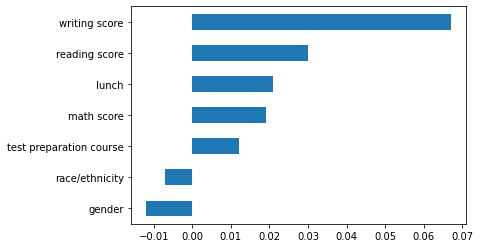

In [434]:
df_perm['imp_mean'].tail(10).plot(kind='barh')

In [435]:
df_perm

,imp_mean,imp_std
gender,-0.012,0.006782
race/ethnicity,-0.007,0.012083
test preparation course,0.012,0.011662
math score,0.019,0.022672
lunch,0.021,0.012000
reading score,0.030,0.025884
writing score,0.067,0.022935
